In [23]:
import csv
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from datetime import datetime, date

In [24]:
nodes = pd.read_csv('UofT_nodes.csv')

In [25]:
nodes.head(50)

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0
5,1969-05-22,2011-10-03,89.0,1,1,0.0,4274.825,8.0,10454.469,25.0,456359.0,107.0,276603.0,164.0,Low,Low,low,Mary Gilmore an,Female,2473.0
6,1951-03-31,2007-08-07,89.0,1,1,0.0,6535.232,8.0,7059.521,21.0,74927.0,17.0,139436.0,58.0,Low,Low,low,Jacqueline Thompson Burke Spann,Female,568597.0
7,1986-08-26,2012-11-26,89.0,1,1,0.0,316.046,0.0,3894.914,16.0,335104.0,93.0,205929.0,205.0,Low,Low,low,"Alderson, James Mccombs Wilcox",Male,395257.0
8,2002-06-24,2012-11-28,89.0,1,1,0.0,4684.540,9.0,1851.315,9.0,348805.0,83.0,521669.0,257.0,Low,Low,low,"Morris, Maria Bitto Minnick",Female,590694.0
9,1968-01-13,1997-12-23,89.0,1,1,0.0,3657.827,6.0,13503.562,35.0,413181.0,108.0,451743.0,315.0,Low,Low,low,"Mcneil, Jennifer Delargy Park",Female,738891.0


In [26]:
occupation = pd.read_csv('UofT_occupation_risk.csv')

In [27]:
occupation.head(50)

,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low
5,5,Low
6,6,Low
7,7,Moderate
8,8,Low
9,9,Low


In [28]:
merged_df = pd.merge(nodes, occupation, left_on = 'OCPTN_NM', right_on = 'code', how = 'left')

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
merged_df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID,code,occupation_risk
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0,89.0,High
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0,89.0,High
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0,89.0,High
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0,89.0,High
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0,89.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0,467.0,Low
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0,467.0,Low
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0,65.0,High
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0,231.0,High


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   BIRTH_DT                1000000 non-null  object 
 1   CUST_ADD_DT             995822 non-null   object 
 2   OCPTN_NM                993616 non-null   float64
 3   RES_CNTRY_CA            1000000 non-null  int64  
 4   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 5   PEP_FL                  1000000 non-null  float64
 6   CASH_SUM_IN             1000000 non-null  float64
 7   CASH_CNT_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_OUT            1000000 non-null  float64
 10  WIRES_SUM_IN            1000000 non-null  float64
 11  WIRES_CNT_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_OUT           1000000 non-null  float64
 14  COU

In [32]:
merged_df.describe()

,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,CUSTOMER_ID,code
count,993616.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,993616.000000
mean,381.329028,0.985686,0.98855,0.097489,15062.980362,8.596567,23353.115677,23.146121,3.411956e+06,85.394548,1.382649e+06,152.431128,5.003547e+05,381.329028
std,302.806156,0.118782,0.10639,0.296623,20323.375203,8.426340,33337.695394,20.867079,5.754767e+06,66.773057,2.165856e+06,120.158287,2.888723e+05,302.806156
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,89.000000,1.000000,1.00000,0.000000,2575.721000,3.000000,3419.478250,8.000000,1.209508e+05,33.000000,1.053308e+05,59.000000,2.501808e+05,89.000000
50%,354.000000,1.000000,1.00000,0.000000,5983.672500,6.000000,8001.721500,17.000000,2.981515e+05,71.000000,2.550340e+05,126.000000,5.003765e+05,354.000000
75%,724.000000,1.000000,1.00000,0.000000,19206.000000,11.000000,29862.000000,32.000000,4.688108e+06,122.000000,1.926422e+06,218.000000,7.505282e+05,724.000000
max,840.000000,1.000000,1.00000,1.000000,188953.000000,79.000000,310117.000000,203.000000,4.781359e+07,605.000000,1.893074e+07,1083.000000,1.000677e+06,840.000000


In [33]:
#change BIRTH_DT into Age
merged_df['BIRTH_DT'] = pd.to_datetime(merged_df['BIRTH_DT'], format='%Y-%m-%d')
merged_df['BIRTH_DT'] = merged_df['BIRTH_DT'].dt.date

today = datetime.now().date()
merged_df['AGE'] = today - merged_df['BIRTH_DT']
merged_df['AGE'] = merged_df['AGE'].dt.days // 365

In [34]:
#change CUST_ADD_DT into date at bank
merged_df['CUST_ADD_DT'] = pd.to_datetime(merged_df['CUST_ADD_DT'], format = '%Y-%m-%d')
merged_df['CUST_ADD_DT'] = merged_df['CUST_ADD_DT'].dt.date

today = datetime.now().date()
merged_df['YEAR_AT_BANK'] = today - merged_df['CUST_ADD_DT']
merged_df['YEAR_AT_BANK'] = merged_df['YEAR_AT_BANK'].dt.days // 365

In [35]:
merged_df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID,code,occupation_risk,AGE,YEAR_AT_BANK
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0,89.0,High,41,15.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0,89.0,High,28,3.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0,89.0,High,60,11.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0,89.0,High,24,21.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0,89.0,High,81,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0,467.0,Low,84,28.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0,467.0,Low,52,27.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0,65.0,High,64,12.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0,231.0,High,39,10.0


In [36]:
cols = ['CUSTOMER_ID', 'NAME', 'AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'YEAR_AT_BANK', 'RISK']

In [37]:
new_df = merged_df[cols]

In [38]:
new_df

,CUSTOMER_ID,NAME,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,YEAR_AT_BANK,RISK
0,935382.0,"Young, Marie Mildren Coleman",41,Female,1,1,0.0,2577.785,2851.663,2.0,7.0,70774.0,24244.0,62.0,35.0,Low,Low,High,15.0,low
1,2305.0,Mark Stupar Lecy,28,Male,1,1,0.0,3035.502,4805.997,2.0,15.0,282929.0,196439.0,76.0,152.0,Low,Low,High,3.0,low
2,472403.0,Dean Glasper Wendel Reeves,60,Male,1,1,0.0,1617.571,3482.809,1.0,11.0,7632.0,33598.0,6.0,20.0,Low,Low,High,11.0,low
3,227994.0,"Hulsey, Linda Rauth",24,Female,1,1,0.0,3587.042,1940.943,5.0,8.0,149253.0,105896.0,71.0,238.0,Low,Low,High,21.0,low
4,418265.0,Carolyn Washington Roberts,81,Female,1,1,0.0,1725.524,13197.169,2.0,43.0,92318.0,187403.0,96.0,180.0,Low,Low,High,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,420884.0,Bret* Dove Gainey,84,Male,0,1,0.0,18945.108,32210.000,10.0,21.0,1186467.0,2550098.0,25.0,174.0,Low,High,Low,28.0,high
999996,429418.0,Anthony Ray Montano Gomez,52,Male,0,1,0.0,5775.601,5015.741,7.0,15.0,244504.0,417992.0,53.0,337.0,Low,Low,Low,27.0,low
999997,731360.0,Bernadette Schofield Pace Mile,64,Female,0,1,0.0,2351.255,15997.000,2.0,19.0,3024271.0,948981.0,68.0,124.0,Low,High,High,12.0,high
999998,837988.0,"Wasson, Russell Terrell",39,Male,0,1,0.0,27312.613,3399.000,8.0,5.0,943477.0,376429.0,9.0,12.0,Low,High,High,10.0,high


In [39]:
new_df.corr()

,CUSTOMER_ID,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,YEAR_AT_BANK
CUSTOMER_ID,1.000000,-0.000694,-0.001143,0.001191,-0.001315,0.000093,-0.000088,0.000630,-0.000459,-0.000155,0.000297,-0.001296,0.000023,-0.000531
AGE,-0.000694,1.000000,-0.033414,-0.007513,0.066780,0.049269,0.125481,0.001712,0.100050,0.149044,0.155162,-0.021321,-0.039639,0.561434
RES_CNTRY_CA,-0.001143,-0.033414,1.000000,0.029049,-0.026723,-0.063550,-0.054083,-0.039347,-0.015968,-0.066683,-0.075422,0.037485,0.021660,0.026352
CNTRY_OF_INCOME_CA,0.001191,-0.007513,0.029049,1.000000,-0.007470,-0.015280,-0.008478,-0.010457,-0.001588,-0.008690,-0.010397,0.009957,0.005815,0.010657
PEP_FL,-0.001315,0.066780,-0.026723,-0.007470,1.000000,0.199309,0.226687,0.143242,0.162801,0.204057,0.197912,0.103780,0.080394,0.119690
CASH_SUM_IN,0.000093,0.049269,-0.063550,-0.015280,0.199309,1.000000,0.586298,0.915346,0.469528,0.473499,0.499819,0.255888,0.316364,0.009426
CASH_SUM_OUT,-0.000088,0.125481,-0.054083,-0.008478,0.226687,0.586298,1.000000,0.512216,0.851496,0.623890,0.628060,0.375184,0.421984,0.135143
CASH_CNT_IN,0.000630,0.001712,-0.039347,-0.010457,0.143242,0.915346,0.512216,1.000000,0.475869,0.362159,0.395442,0.275431,0.357508,-0.009142
CASH_CNT_OUT,-0.000459,0.100050,-0.015968,-0.001588,0.162801,0.469528,0.851496,0.475869,1.000000,0.447223,0.467904,0.479200,0.547312,0.159565
WIRES_SUM_IN,-0.000155,0.149044,-0.066683,-0.008690,0.204057,0.473499,0.623890,0.362159,0.447223,1.000000,0.864838,0.404182,0.336000,0.126745


<AxesSubplot:>

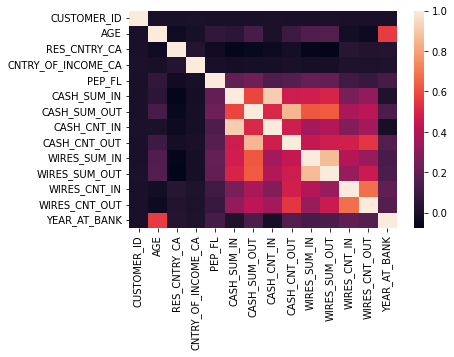

In [40]:
sns.heatmap(new_df.corr())

In [49]:
columns = ['AGE', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'YEAR_AT_BANK', 'RISK']
data = new_df[columns]

In [50]:
data

,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,YEAR_AT_BANK,RISK
0,41,1,1,0.0,2577.785,2851.663,2.0,7.0,70774.0,24244.0,62.0,35.0,15.0,low
1,28,1,1,0.0,3035.502,4805.997,2.0,15.0,282929.0,196439.0,76.0,152.0,3.0,low
2,60,1,1,0.0,1617.571,3482.809,1.0,11.0,7632.0,33598.0,6.0,20.0,11.0,low
3,24,1,1,0.0,3587.042,1940.943,5.0,8.0,149253.0,105896.0,71.0,238.0,21.0,low
4,81,1,1,0.0,1725.524,13197.169,2.0,43.0,92318.0,187403.0,96.0,180.0,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,0,1,0.0,18945.108,32210.000,10.0,21.0,1186467.0,2550098.0,25.0,174.0,28.0,high
999996,52,0,1,0.0,5775.601,5015.741,7.0,15.0,244504.0,417992.0,53.0,337.0,27.0,low
999997,64,0,1,0.0,2351.255,15997.000,2.0,19.0,3024271.0,948981.0,68.0,124.0,12.0,high
999998,39,0,1,0.0,27312.613,3399.000,8.0,5.0,943477.0,376429.0,9.0,12.0,10.0,high


In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, data['RISK'], test_size=0.2, random_state=0)
